In [1]:
import numpy as np
import Spectrogram
from librosa.core import note_to_hz
import torch

In [2]:
import matplotlib.pyplot as plt

In [29]:
# parameters
# nargin = 6
bins = 24 # bins per octave
fs = 22050 # sampling rate
n_bins = 80
# fmax = 61.73541266 # same as 1 octave
fmax = 880
fmin = note_to_hz('A3')
thresh= 0.0054

stride = 512

s = np.linspace(0,10,fs*10)
x = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*500*s, dtype=np.float32) \
    + np.sin(2*np.pi*800*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32)  

# Pytorch Implmentation

In [30]:
mel_spectrogram = Spectrogram.MelSpectrogram()

In [31]:
melspec_torch = mel_spectrogram(torch.tensor(x))

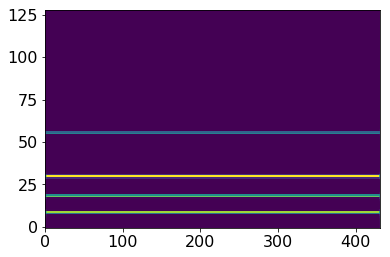

In [39]:
plt.imshow(melspec_torch[0].numpy(), aspect='auto', origin='lower')
plt.tick_params(labelsize=16)

# Librosa Implmentation

In [9]:
from librosa.feature import melspectrogram

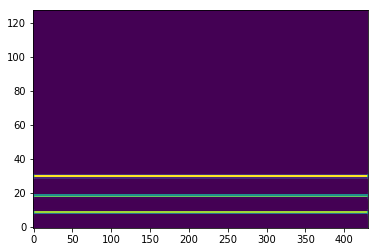

In [10]:
plt.imshow(melspectrogram(x), aspect='auto', origin='lower')

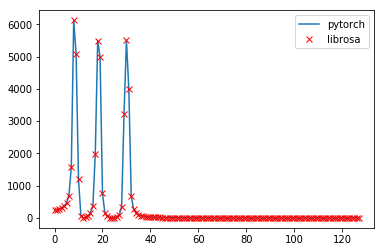

In [15]:
plt.plot(melspec_torch[0].numpy()[:,0])
plt.plot(melspectrogram(x)[:,0], 'rx')
plt.legend(['pytorch', 'librosa'])

In [12]:
np.allclose(melspec_torch[0].numpy()[:,0], melspectrogram(x)[:,0])

True